In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data = pd.read_csv('bank-full (1).csv')

In [29]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [30]:
# Define the features (X) and the target variable (y)
X = data.drop(columns=['y'])
y = data['y']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize and train the logistic regression model with scaled data
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [36]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.12
Confusion Matrix:
[[  15 7937]
 [   0 1091]]
Classification Report:
              precision    recall  f1-score   support

          no       1.00      0.00      0.00      7952
         yes       0.12      1.00      0.22      1091

    accuracy                           0.12      9043
   macro avg       0.56      0.50      0.11      9043
weighted avg       0.89      0.12      0.03      9043



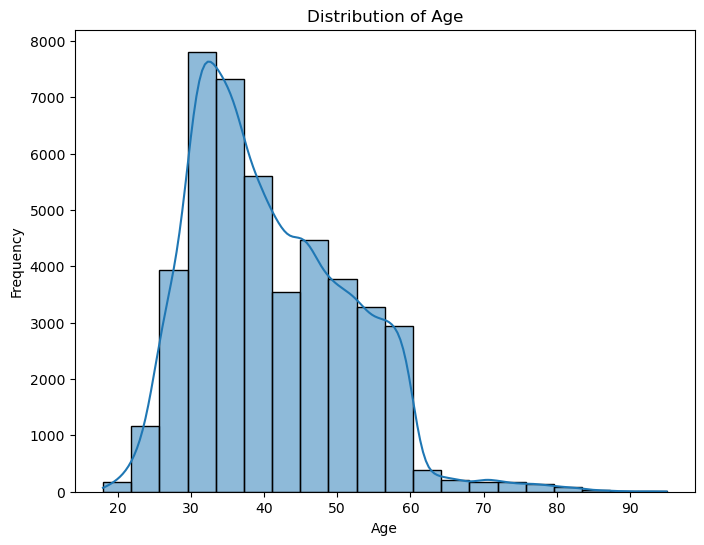

In [37]:
# Perform data visualization
# Example: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

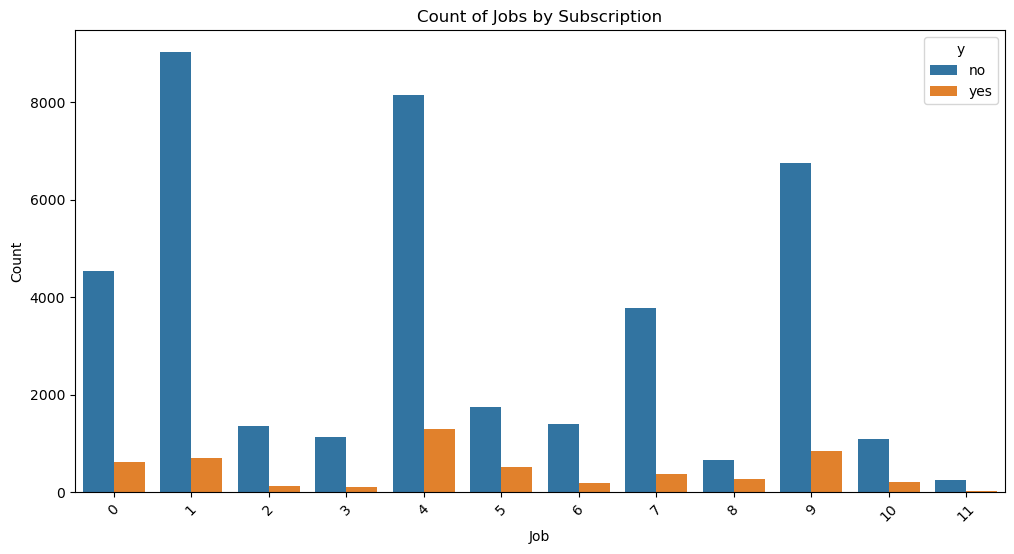

In [38]:
# Example: Countplot of Job Types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job', hue='y')
plt.title('Count of Jobs by Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

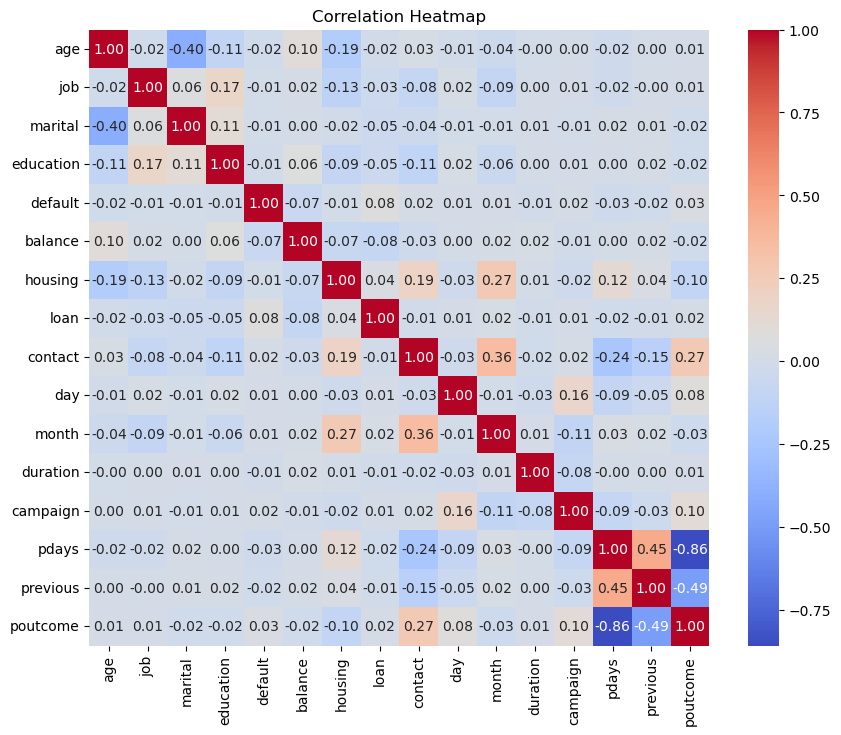

In [39]:
# Example: Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [53]:
# Convert 'yes' to 1 and 'no' to 0 in the target variable
y = np.where(y == 'yes', 1, 0)

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize and train the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [56]:
# Predict probabilities for the positive class
y_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]

In [61]:
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)

In [62]:
# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

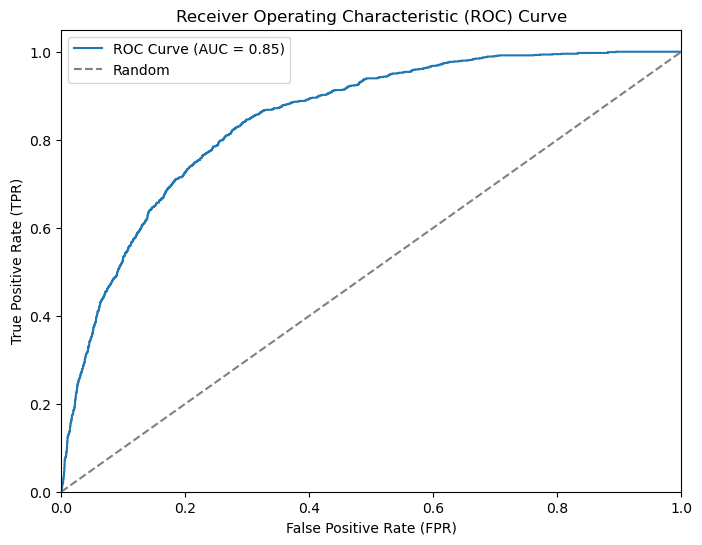

In [64]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()